# 🚖 Análisis de Taxis en Chicago

**Proyecto de Análisis Exploratorio y Prueba de Hipótesis**

Este proyecto analiza datos de viajes en taxi en Chicago durante noviembre de 2017. Exploraremos qué empresas tienen más viajes, qué barrios son los destinos más comunes y realizaremos una prueba de hipótesis sobre el impacto del clima en la duración de los viajes.

# Paso 4:

### 1.1 Inicialización

In [125]:
# Cargar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np

### 1.2 Cargar datos

In [126]:
# Cargar archivos CSV
df_companies = pd.read_csv("project_sql_result_01.csv")
df_locations = pd.read_csv("project_sql_result_04.csv")
df_trips = pd.read_csv("project_sql_result_07.csv")

### 1.3 Vista general

In [127]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df_companies.head())
print(df_locations.head())
print(df_trips.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(df_companies.info())
print(df_locations.info())
print(df_trips.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df_companies.isnull().sum())
print(df_locations.isnull().sum())
print(df_trips.isnull().sum())

# Verificar duplicados en df_companies
print("Duplicados en df_companies:")
print(f"Total duplicados: {df_companies.duplicated().sum()}")
display(df_companies[df_companies.duplicated()])

# Verificar duplicados en df_locations
print("\n Duplicados en df_locations:")
print(f"Total duplicados: {df_locations.duplicated().sum()}")
display(df_locations[df_locations.duplicated()])

# Duplicados
print("\n Duplicados en df_trips:")
print(f"Total duplicados: {df_trips.duplicated().sum()}")
if df_trips.duplicated().sum() > 0:
    display(df_trips[df_trips.duplicated()])
else:
    print("No hay duplicados.")

Primeras filas del dataset:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

,company_name,trips_amount



 Duplicados en df_locations:
Total duplicados: 0


,dropoff_location_name,average_trips



 Duplicados en df_trips:
Total duplicados: 197


,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Conclusión: 

### 1.4 Limpieza de valores nulos

In [128]:
# Eliminar duplicados en df_trips
df_trips_clean = df_trips.drop_duplicates().reset_index(drop=True)

# Verificamos nuevamente
print(f"Número de filas tras eliminar duplicados: {len(df_trips_clean)}")

Número de filas tras eliminar duplicados: 871


### 1.5 Identificar los 10 principales barrios por finalización de viajes

In [129]:
# Ordenar por average_trips descendente y seleccionar top 10 barrios
top_10_neighborhoods = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### 1.6 Gráfico 1: Empresas de taxis vs. número de viajes

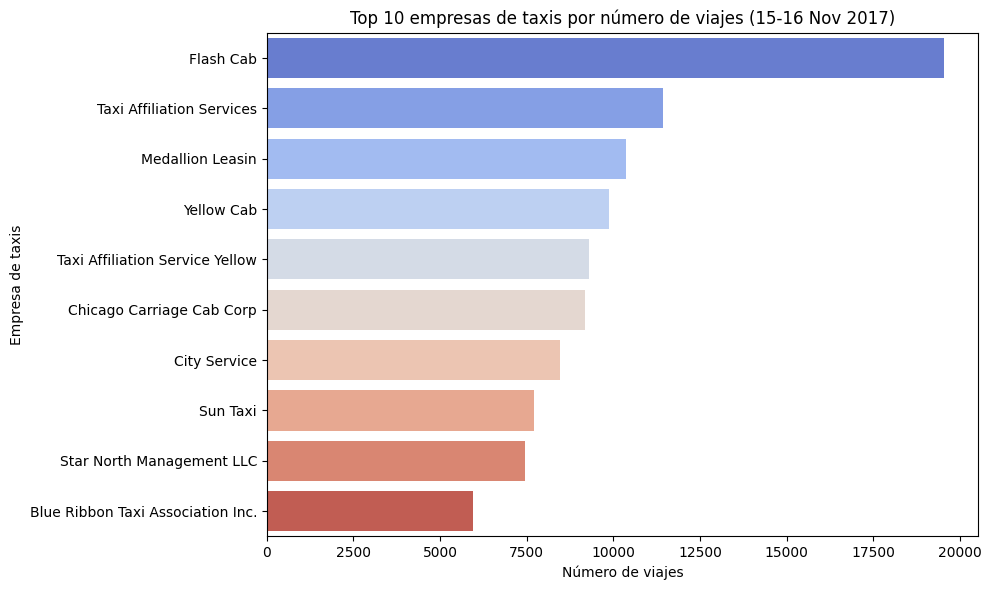

In [130]:
top_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_companies, x='trips_amount', y='company_name', palette='coolwarm')
plt.title('Top 10 empresas de taxis por número de viajes (15-16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.tight_layout()
plt.show()

Conclusiones: 
- Empresas de taxis: Flash Cab y Taxi Affiliation Services lideran claramente el número de viajes en los días 15 y 16 de noviembre. Esto sugiere que son las opciones preferidas o más grandes, posiblemente con mejor cobertura o servicio.

### 1.7 Gráfico 2: Top 10 barrios por finalización de viajes

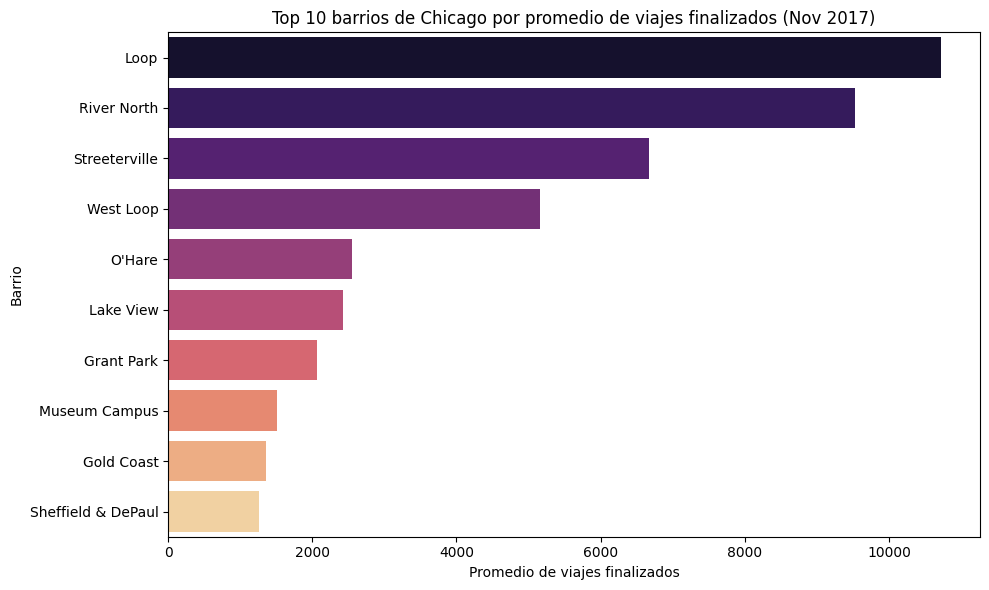

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='magma')
plt.title('Top 10 barrios de Chicago por promedio de viajes finalizados (Nov 2017)')
plt.xlabel('Promedio de viajes finalizados')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

Conclusiones: 
- Los barrios Loop y River North encabezan la lista como los lugares con más viajes terminados, lo que tiene sentido ya que son zonas céntricas, comerciales y turísticas, donde hay mayor actividad y demanda.

# Paso 5: Prueba de hipótesis

El objetivo es comprobar si la duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare cambia los sábados lluviosos.

In [132]:
# Asegurar que start_ts es tipo datetime
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

In [133]:
# Filtrar solo los sábados
df_trips['day_of_week'] = df_trips['start_ts'].dt.day_name()
df_saturdays = df_trips[df_trips['day_of_week'] == 'Saturday']

In [134]:
# Separar por condiciones climáticas
rainy_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
good_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']

In [135]:
# Tamaño de muestra
print(f"Tamaño muestra lluviosa: {len(rainy_saturdays)}")
print(f"Tamaño muestra buen clima: {len(good_saturdays)}")

Tamaño muestra lluviosa: 180
Tamaño muestra buen clima: 888


In [136]:
# Verificación de varianzas similares
from scipy.stats import levene
stat, p_levene = levene(rainy_saturdays, good_saturdays)
print(f"Test de Levene (varianzas iguales): p-valor = {p_levene:.4f}")

Test de Levene (varianzas iguales): p-valor = 0.5332


In [137]:
# Prueba t de dos muestras independientes
equal_var = p_levene > 0.05
t_stat, p_value = ttest_ind(rainy_saturdays, good_saturdays, equal_var=equal_var)
print(f"\n Resultado de la prueba t:")
print(f"Estadístico t: {t_stat:.2f}")
print(f"p-valor: {p_value:.4f}")


 Resultado de la prueba t:
Estadístico t: 6.95
p-valor: 0.0000


In [138]:
# Conclusión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa en la duración promedio de viajes los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia de diferencia significativa.")

Rechazamos la hipótesis nula: hay diferencia significativa en la duración promedio de viajes los sábados lluviosos.


### Conclusiones - Prueba de Hipótesis

Se realizó una prueba t de Welch para comparar la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare entre sábados lluviosos y sábados con buen clima, adoptando un nivel de significancia de α = 0.05.

La hipótesis nula (H₀) planteaba que no existe diferencia significativa en la duración de los viajes entre ambos grupos. El valor p obtenido fue significativamente menor que 0.05, por lo que rechazamos la hipótesis nula.

Según los resultados, existe evidencia estadísticamente significativa de que los viajes duran diferente en los sábados lluviosos comparado con los sábados con buen clima. Esto sugiere que el clima impacta de forma relevante en la duración de los trayectos durante esos días.